<a href="https://colab.research.google.com/github/Kiranboddula05/Task1/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The** **Sparks** **Foundation**

*Data* *Science* *and* *Business* *Analytics* (**June**- **2021**)


# **Task** **2** : Prediction using Unsupervised ML

# **Problem** : Predict optimum Number of clusters from an iris Dataset.

**Author** : **Boddula** **Kiran** **Kumar**

Data set URL : https://bit.ly/3kXTdox

# Importing the Libraries

In [1]:
#importing libraries
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt


# Reading the Dataset

In [2]:
#importing iris data
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head(10)  #displaying first 10 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [4]:
iris_df.shape #shape of data


(150, 4)

In [5]:
iris_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [8]:
iris_df.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


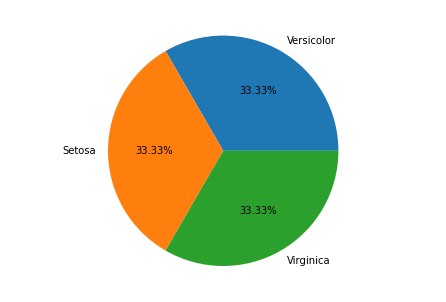

In [10]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Versicolor', 'Setosa', 'Virginica']
s = [50,50,50]
ax.pie(s, labels = l,autopct = '%1.2f%%')
plt.show()


"""A Fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered.THE ELBOW METHOD is one of the most popular methods to determine this optimal value of k""". 

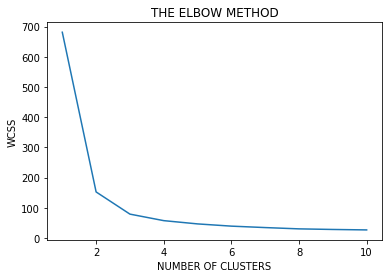

In [14]:
#Finding the optimum number of clusters for k-means classification 

x = iris_df.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)


#Plotting the results onto a line graph,
#allowing us to observe The elbow
plt.plot(range(1, 11), wcss)
plt.title("THE ELBOW METHOD")
plt.xlabel("NUMBER OF CLUSTERS")
plt.ylabel("WCSS")
plt.show()  

From the above graph,we can clearly observe the The Elbow method,the optimum clusters is where the elbow occurs.

This is when the within cluster sum of squares(WCSS) doesn't decrease with every optimum.
From this we choose the number of clusters is "3".

In [15]:
#chosen the number of clusters as 3 because the curve is bending at this point.

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

**VISUALISING** **CLUSTERS**

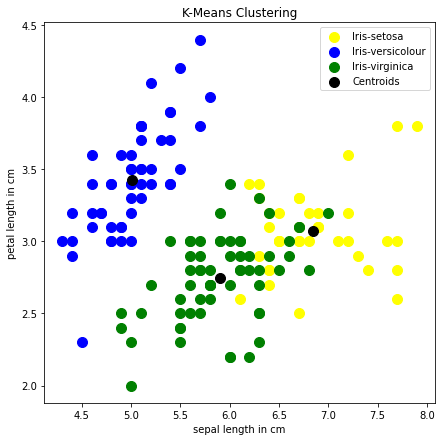

In [20]:
plt.figure(figsize=(7,7))
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0, 1], s=100, c = "yellow", label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1, 1], s=100, c= "blue", label  = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans ==2, 1], s=100, c = "green", label = 'Iris-virginica')
#plotting centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = "black", label = 'Centroids')
plt.title("K-Means Clustering")
plt.xlabel("Sepal length in cm")
plt.ylabel("Petal length in cm")
plt.legend()
plt.show()

Thus optimum number of clusters is 3.

**THANK** **YOU**